# Data Science Challenge

This challenge was developed in PYTHON 3 as show on readme.md

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### importing data set

In [2]:
data = pd.read_csv('bank-full.csv', sep=';', quotechar='"', encoding='utf8',parse_dates=True)
data.shape

(45211, 17)

In [3]:
data.head(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## First question

In [4]:
# Housing and loan variables was used
data['housing'].unique()
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
# Create a new Dataframe with 0 and 1 for 'Housing' and 'loan' variables and grouping by variable 'job'
new_df = pd.get_dummies(data[['job', 'housing', 'loan']], columns=['housing', 'loan'])
new_df_group = new_df.groupby('job', as_index=False).sum()
new_df_group

,job,housing_no,housing_yes,loan_no,loan_yes
0,admin.,1989.0,3182.0,4180.0,991.0
1,blue-collar,2684.0,7048.0,8048.0,1684.0
2,entrepreneur,618.0,869.0,1131.0,356.0
3,housemaid,842.0,398.0,1088.0,152.0
4,management,4780.0,4678.0,8205.0,1253.0
5,retired,1773.0,491.0,1955.0,309.0
6,self-employed,814.0,765.0,1350.0,229.0
7,services,1388.0,2766.0,3318.0,836.0
8,student,689.0,249.0,926.0,12.0
9,technician,3482.0,4115.0,6288.0,1309.0


In [6]:
# Calculating trend value
new_df_group['housing'] = new_df_group['housing_yes']/(new_df_group['housing_yes'] + new_df_group['housing_no'])
new_df_group['loan'] = new_df_group['loan_yes']/(new_df_group['loan_yes'] + new_df_group['loan_no'])

In [7]:
# Sort values by highest to lowest housing loan variables
new_df_group = new_df_group.sort_values(by='housing', ascending=False)
new_df_group

,job,housing_no,housing_yes,loan_no,loan_yes,housing,loan
1,blue-collar,2684.0,7048.0,8048.0,1684.0,0.724209,0.173037
7,services,1388.0,2766.0,3318.0,836.0,0.665864,0.201252
0,admin.,1989.0,3182.0,4180.0,991.0,0.615355,0.191646
2,entrepreneur,618.0,869.0,1131.0,356.0,0.584398,0.239408
9,technician,3482.0,4115.0,6288.0,1309.0,0.541661,0.172305
4,management,4780.0,4678.0,8205.0,1253.0,0.494608,0.132480
6,self-employed,814.0,765.0,1350.0,229.0,0.484484,0.145028
10,unemployed,760.0,543.0,1194.0,109.0,0.416731,0.083653
3,housemaid,842.0,398.0,1088.0,152.0,0.320968,0.122581
8,student,689.0,249.0,926.0,12.0,0.265458,0.012793


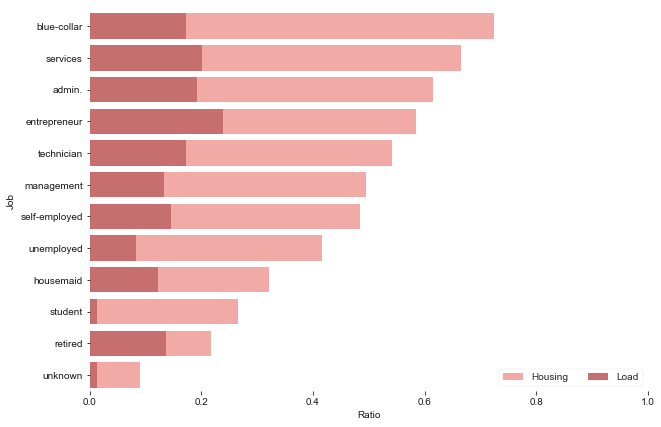

In [8]:
# Initialize the matplotlib figure and seabond sytle
f, ax = plt.subplots(figsize=(10,7))
sns.set(style='whitegrid')
sns.set_color_codes('pastel')
sns.barplot(x='housing', y='job', data=new_df_group, label='Housing', color='r')

sns.set_color_codes('muted')
sns.barplot(x='loan', y='job', data=new_df_group, label='Load', color='r')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlim=(0, 1), ylabel='Job', xlabel='Ratio')
sns.despine(left=True, bottom=True)
plt.savefig('question_1.png');

## Second question

In [9]:
# initially the variable "y" must be grouped, then the .count() operation is applied
new_df2 = data.groupby('y', as_index=False).count()
new_df2

,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
1,yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


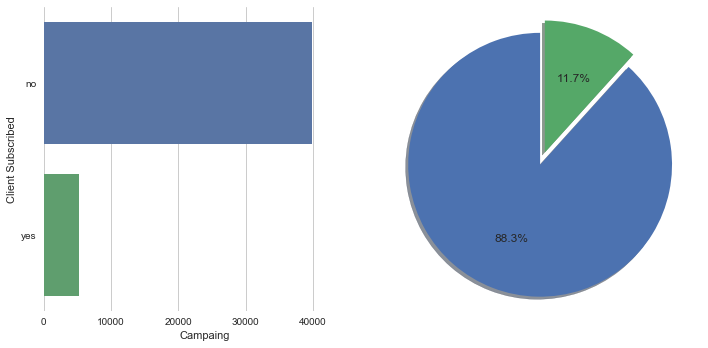

In [10]:
# initialize the matplotlib figure and seabond sytle
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.barplot(x='campaign', y='y', data=new_df2, ax=ax1)
ax1.set(xlim=(0, new_df2['campaign'].max()*1.2), ylabel='Client Subscribed', xlabel='Campaing')
sns.despine(left=True, bottom=True)
# Pie plot
explode = (0, 0.1)  
ax2.pie(new_df2['campaign'], explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.axis('equal')
plt.tight_layout()
plt.savefig('question_2.png')

## Third question

In [11]:
new_df3 = pd.DataFrame({'campaign_no': data[data['y'] == 'no']['campaign'].describe()})
new_df3['campaign_yes'] = data[data['y'] == 'yes']['campaign'].describe()
new_df3

,campaign_no,campaign_yes
count,39922.000000,5289.000000
mean,2.846350,2.141047
std,3.212767,1.921826
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,63.000000,32.000000


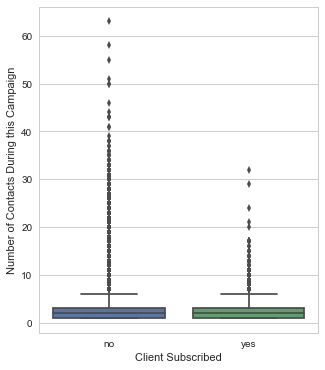

In [12]:
# initialize the matplotlib figure and seabond sytle
f, ax = plt.subplots(figsize=(5,6))
sns.boxplot(x='y', y='campaign', data=data)
ax.set(ylabel='Number of Contacts During this Campaign', xlabel='Client Subscribed')
plt.savefig('question_3.png')

## Fourth question

In [13]:
new_df4 = pd.get_dummies(data[['poutcome', 'y']])
correlation = new_df4.corr(method='pearson')
correlation

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
poutcome_failure,1.000000,-0.071820,-0.064838,-0.737932,-0.009885,0.009885
poutcome_other,-0.071820,1.000000,-0.038300,-0.435903,-0.031955,0.031955
poutcome_success,-0.064838,-0.038300,1.000000,-0.393525,-0.306788,0.306788
poutcome_unknown,-0.737932,-0.435903,-0.393525,1.000000,0.167051,-0.167051
y_no,-0.009885,-0.031955,-0.306788,0.167051,1.000000,-1.000000
y_yes,0.009885,0.031955,0.306788,-0.167051,-1.000000,1.000000


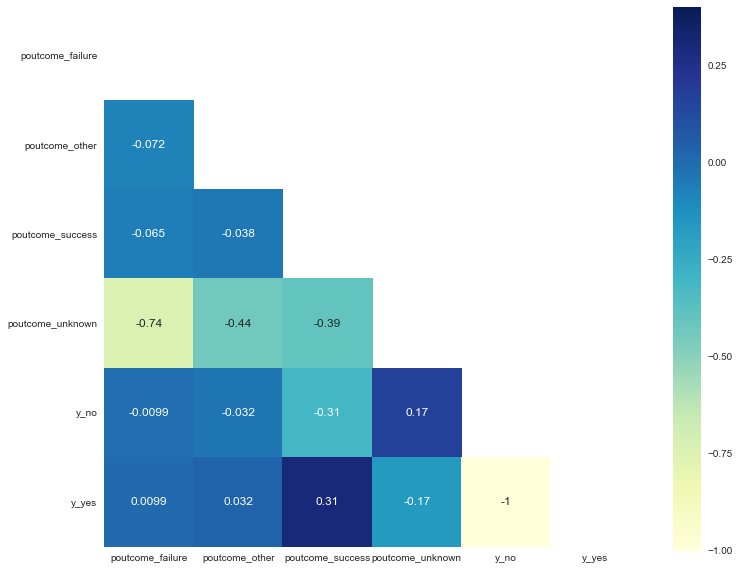

In [14]:
# initialize the matplotlib figure and seabond sytle
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    plt.figure(figsize=(12,10))
    ax = sns.heatmap(correlation, mask=mask, vmax=.4, square=True,annot=True, cmap='YlGnBu')
    plt.savefig('question_4.png')

## Fifth question

In [15]:
default_y = data[(data['default'] == 'yes') ]['balance']
default_n = data[(data['default'] == 'no') ]['balance']

In [16]:
new_df5 = pd.DataFrame({'default_yes': data[(data['default'] == 'yes') ]['balance'].describe()})
new_df5['default_no'] = data[(data['default'] == 'no') ]['balance'].describe()
new_df5

,default_yes,default_no
count,815.000000,44396.000000
mean,-137.624540,1389.806424
std,906.704678,3063.275425
min,-8019.000000,-4057.000000
25%,-339.000000,84.000000
50%,-7.000000,468.000000
75%,15.000000,1462.250000
max,16486.000000,102127.000000


/Users/p1p3/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/p1p3/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


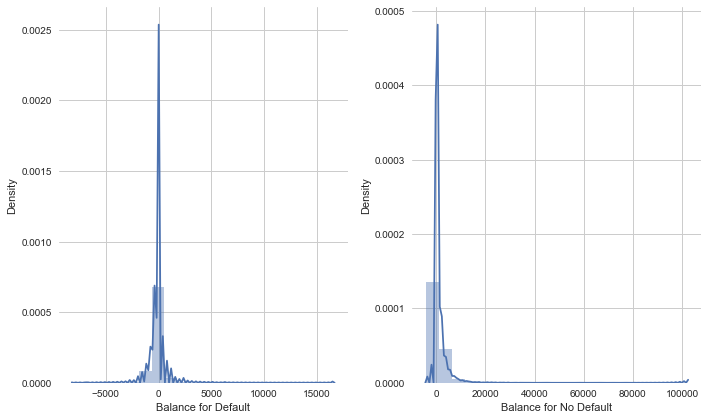

In [17]:
# initialize the matplotlib figure and seabond sytle
f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
sns.distplot(default_y, kde=True, bins=20, ax=ax1)
ax1.set(ylabel='Density', xlabel='Balance for Default')
sns.despine(left=True, bottom=True)

sns.distplot(default_n, kde=True, bins=20, ax=ax2)
ax2.set(ylabel='Density', xlabel='Balance for No Default')
plt.tight_layout()
plt.savefig('question_5.png')

## Sixth question

In [18]:
Caracteristics = ['job', 'marital', 'education', 'default', 'loan']
new_df6 = data[data['housing'] == 'yes'][Caracteristics].describe()
new_df6

,job,marital,education,default,loan
count,25130,25130,25130,25130,25130
unique,12,3,4,2,2
top,blue-collar,married,secondary,no,no
freq,7048,15321,14038,24695,20763


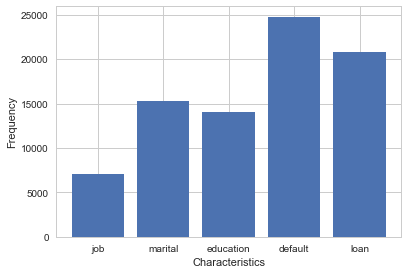

In [19]:
# initialize the matplotlib figure and seabond sytle
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.15, 0.15, 0.8, 0.8])
ax.bar(Caracteristics,new_df6.loc['freq'])
ax.set_ylabel('Frequency')
ax.set_xlabel('Characteristics')
plt.savefig('question_6.png')
